[View in Colaboratory](https://colab.research.google.com/github/MarcChevallier/Notebooks/blob/master/An%C3%A1lise_Programa%C3%A7%C3%A3o_Linear_Bike_Rio.ipynb)

In [0]:
!pip install -U -q PyDrive
!pip install -q xlrd

In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime
import calendar

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id': '1KC6HGKZrfKpL3BlxlBWxf9zlJ0ADEgr1'})
downloaded.GetContentFile('estados.csv')
estados = pd.read_csv('estados.csv', names = ['id da estação', 'hora da coleta', 'bikes livres', 'total de bikes', 'status'])
estados['hora da coleta'] = pd.to_datetime(estados['hora da coleta'])
estados['hora da coleta'] = estados['hora da coleta'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M'))
estados['hora da coleta'] = pd.to_datetime(estados['hora da coleta'])
estados = estados.pivot_table(index=['hora da coleta', 'id da estação', 'status'], values = ['bikes livres', 'total de bikes'], aggfunc='sum').reset_index()
estados = estados[~estados['hora da coleta'].isin(['2016-02-20 23:00:00', '2016-02-20 23:30:00'])]

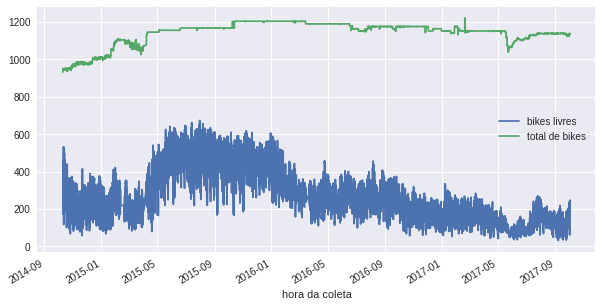

In [8]:
estados.pivot_table(index='hora da coleta', values = ['bikes livres', 'total de bikes'], aggfunc='sum').plot.line(figsize=(10,5));

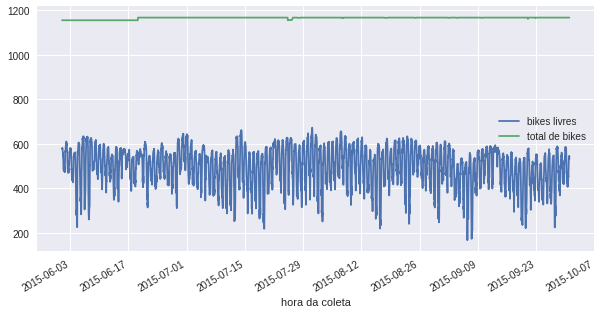

In [9]:
df = estados
df = df[(df['hora da coleta'].dt.year == 2015)&(df['hora da coleta'].dt.month >=6)&(df['hora da coleta'].dt.month <10)]
df.pivot_table(index='hora da coleta', values = ['bikes livres', 'total de bikes'], aggfunc='sum').plot.line(figsize=(10,5));
df.columns = ['datetime', 'id', 'status', 'livres', 'total']

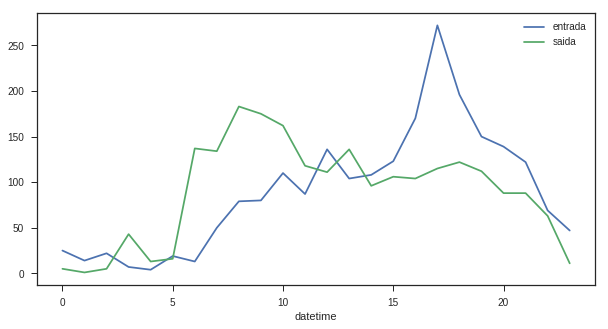

In [13]:
dt = df.sort_values(by=['id','datetime'])
dt['diffs'] = dt['livres'].diff()
dt['saida'] = abs(dt[dt['diffs']<=0]['diffs'])
dt['entrada'] = dt[dt['diffs']>=0]['diffs']
dt.fillna(0,inplace=True)
dt[dt['id']==1].pivot_table(index=dt['datetime'].dt.hour, values = ['entrada', 'saida'], aggfunc='sum').plot.line(figsize=(10,5));


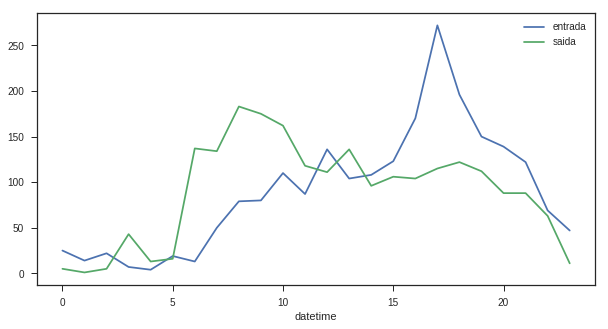

In [0]:
import seaborn as sns
sns.set(style="ticks")

In [31]:

dt['id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95])

In [0]:
dados = dt[dt['status']==2].pivot_table(index=[dt['datetime'].dt.hour, 'id'], values=['livres', 'total'], aggfunc='mean').reset_index()
dados['total'] = dados['total']
#dados = dados[(dados['datetime']>8) & (dados['datetime']<22) & (dados['id'].isin([3,5,6,17,20,33,35, 8, 14, 23, 32, 56, 58,86]))]
dados = dados[(dados['datetime']>8) & (dados['datetime']<22) & (dados['id']<51)]
dados.columns = ['hora', 'estação', 'bikes livres', 'capacidade']

In [35]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
dados = dados[(dados['datetime']>8) & (dados['datetime']<22) & (dados['id'].isin([3,5,6,17,20,33,35]))]
dados = dados[(dados['datetime']>8) & (dados['datetime']<22) & (dados['id']>37)]

Found GPU at: /device:GPU:0


In [61]:
dados = dados[(dados['datetime']>8) & (dados['datetime']<22) & (dados['id'].isin([3,5,6,17,20,33,35]))]

,position,step,id
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
5,-1,5,0
6,0,6,0
7,0,7,0
8,1,8,0
9,0,9,0


In [99]:
dados['total'].value_counts()

12.0    247
14.0    195
Name: total, dtype: int64

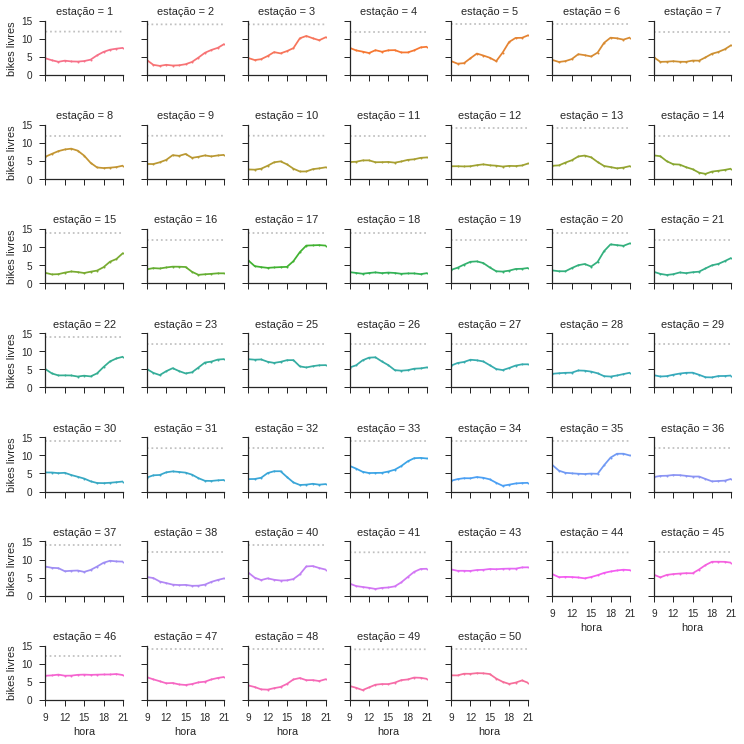

In [137]:

df = dados

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="estação", hue="estação", col_wrap=7, size=1.5)

# Draw a horizontal line to show the starting point


grid.map(plt.plot, "hora", 'capacidade', ls=":", ms=".5", color='silver')
# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "hora", "bikes livres", marker="o", ms=2)

# Adjust the tick positions and labels
grid.set(xticks=[9,12,15,18,21], yticks=[0,5, 10, 15], xlim=(9, 21), ylim=(0, 15))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

  

In [0]:
dt.pivot